In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

#Step 1: Load the dataset 
path = r"C:\Users\Akhila\Documents\Deep Learning\diabetes.csv"
data = pd.read_csv(path)
print(data)

#Step 2: Preprocessing

#removing the zeroes and replacing with NaN
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns] = data[columns].replace(0, np.nan)

#fillinf the NaN values with median of respective columns
data[columns] = data[columns].fillna(data[columns].median())




     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

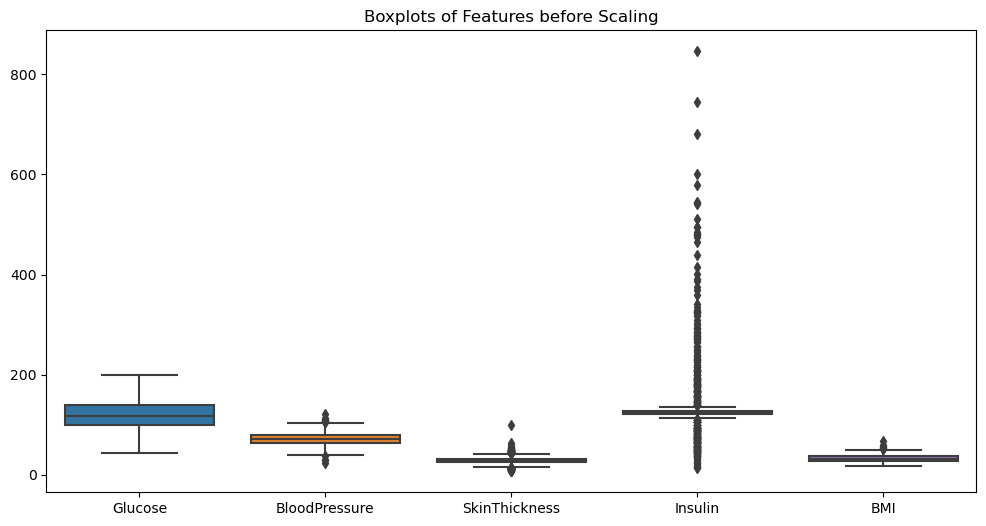

In [38]:
#Data before scaling
plt.figure(figsize=(12,6))
sns.boxplot(data=data[columns])

plt.title('Boxplots of Features before Scaling')
plt.show()

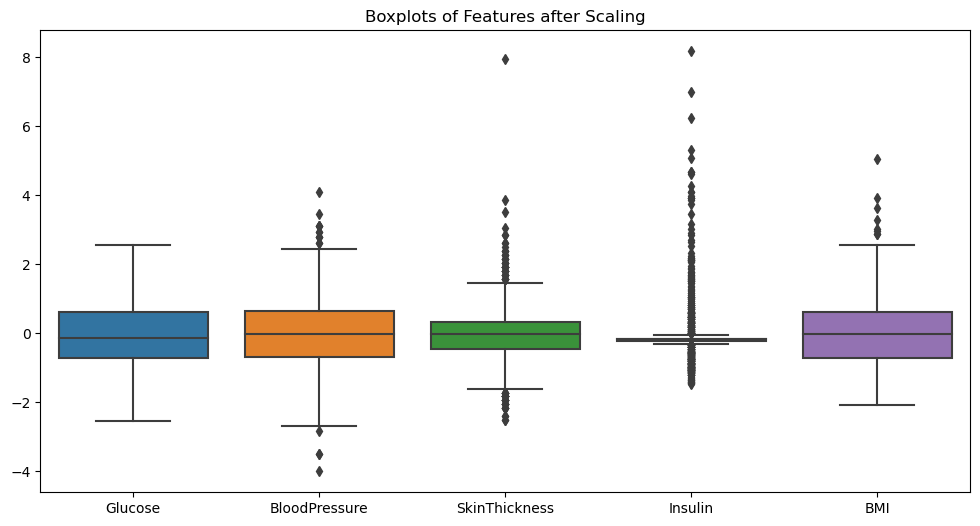

In [39]:
#Step 3: Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_column = data.columns[:-1]
data[scaled_column] = scaler.fit_transform(data[scaled_column])

#Data after scaling
plt.figure(figsize=(12,6))
sns.boxplot(data=data[columns])

plt.title('Boxplots of Features after Scaling')
plt.show()


In [40]:
#Step 4: Splitting the data into features and target
X = data.drop(columns = 'Outcome').values
y = data['Outcome'].values

#Step 5: Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#Step 6: Perceptron Algorithm implementation
class Perceptron:
    def __init__(self,learning_rate=0.01, iters=1000):
        self.lr = learning_rate
        self.iters = iters
        self.weights = None
        self.bias = None
        
    def fit(self,X,y):
        n_sample, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        y_ = np.where(y>0, 1, -1)   #converting labels to +1 and -1 for the Perceptron learning rule
        
        for _ in range(self.iters):
            for i, x_i in enumerate(X):
                l_op  = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.sign(l_op)
                
                if y_[i] * y_predicted <= 0:
                    self.weights += self.lr * y_[i] * x_i
                    self.bias += self.lr * y_[i]
                    
    def predict(self,X):
        l_op = np.dot(X,self.weights) + self.bias
        return np.sign(l_op)
    
    
#Step 7: Training Perceptron
perceptron = Perceptron(learning_rate = 0.01, iters=1000)
perceptron.fit(X_train, y_train)

#Step 8: Make Predictions
y_pred = perceptron.predict(X_test)
y_pred_class = np.where(y_pred>0, 1, 0)

#Step 9: Calculate Accuracy
accuracy = np.mean(y_pred_class == y_test)
print(f"Perceptron Model Accuracy: {accuracy*100:.2f}%")

#Precision, Recall and F1-score
class_report = classification_report(y_test, y_pred_class)
print(class_report)


Perceptron Model Accuracy: 81.82%
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        99
           1       0.79      0.67      0.73        55

    accuracy                           0.82       154
   macro avg       0.81      0.79      0.79       154
weighted avg       0.82      0.82      0.81       154



<Figure size 1200x800 with 0 Axes>

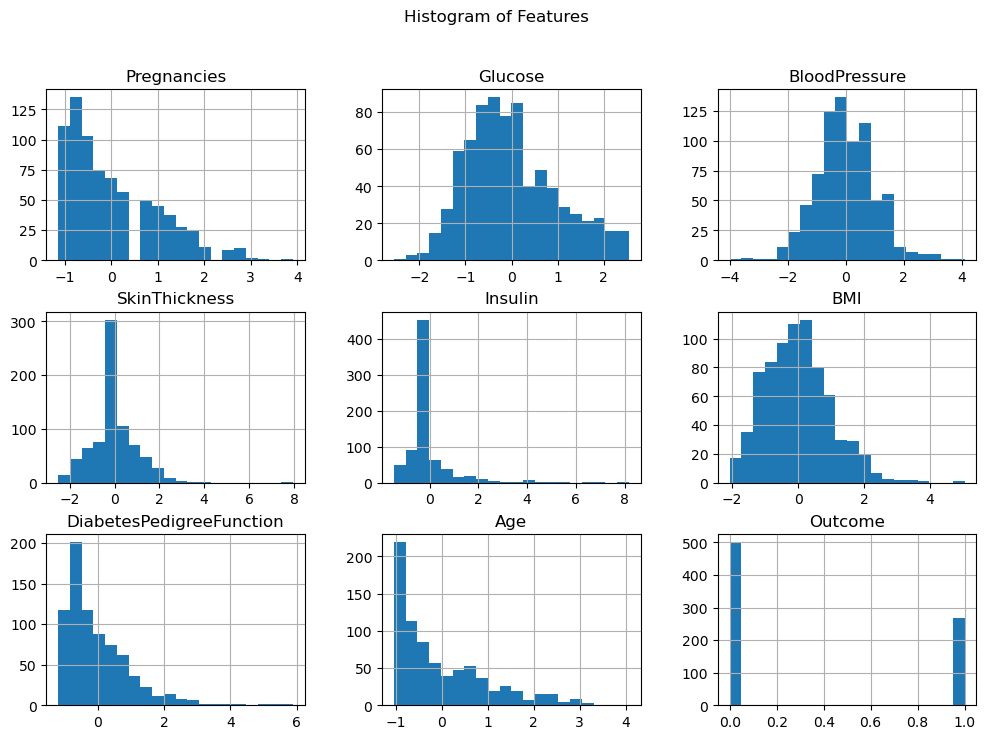

In [28]:
#Visualisation of the outcome
plt.figure(figsize=(12,8))
data.hist(figsize=(12,8),bins=20)

plt.suptitle("Histogram of Features")
plt.show()